# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data)

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [9]:
df = pd.read_csv("titanic.csv")
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [10]:
print(df['Age'].mean())

29.69911764705882


In [18]:
survived = df['Survived']==1
avg_survived = df[survived]
#print(avg_survived)
avg_survived['Age'].mean()

28.343689655172415

In [20]:
first_class = df['Pclass']==1
nonsurv_first = df[(~survived) & (first_class)]
#print(nonsurv_first)
nonsurv_first['Age'].mean()

43.6953125

In [24]:
male = df['Sex']=='male'
avg_age= df[(male) & (avg_survived['Age']>30) & (avg_survived['Embarked']!='Q')]
#print(avg_age)
avg_age['Age'].mean()

41.48780487804878

**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [28]:
print(df['Age'].median())
print(avg_survived['Age'].median())
print(nonsurv_first['Age'].median())
print(avg_age['Age'].median())


28.0
28.0
45.25
38.0


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [29]:
df['Pclass'].mode()

0    3
dtype: int64

In [30]:
df['Embarked'].mode()

0    S
dtype: object

In [31]:
avg_survived['SibSp'].mode()

0    0
dtype: int64

**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [36]:
fares = df['Fare']
z_score = (fares.median() - fares.mean())/fares.std()
if(0<abs(z_score)<1):
    Range = '0-1'
elif(1<=abs(z_score)<2):
    Range = '1-2'
elif(2<=abs(z_score)<3):
    Range = '2-3'
    
print('Range', Range)
print('It is {} the mean'.format("above" if z_score >0 else "below"))


Range 0-1
It is below the mean


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [39]:
fares.quantile(0.9) - fares.quantile(0.05)

70.7333

In [46]:
sort_fare = df.sort_values(['Fare'])
#print(sort_fare)
print(sort_fare.quantile(0.9)['Pclass'])
print(sort_fare.quantile(0.05)['Pclass'])

3.0
1.0


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [49]:
ports = {'C': 'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}
avg_fare_port = pd.Series()
group_port = df.groupby('Embarked')
for port, group in group_port:
    avg_fare_port[ports[port]]= group['Fare'].mean()

sort_port = avg_fare_port.sort_values(ascending=False)
sort_port.head()
    

Cherbourg      59.954144
Southampton    27.079812
Queenstown     13.276030
dtype: float64

**What is the most common passenger class for each port?**

In [51]:
common_class = pd.DataFrame()
for port, group in group_port:
    common_class[ports[port]] = pd.Series(group['Pclass'].mode())

common_class

,Cherbourg,Queenstown,Southampton
0,1,3,3


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [56]:
median_fare = df['Fare'].median()
surv_1class_male = df[(survived) & (first_class) & (male)]
lower = surv_1class_male[surv_1class_male['Fare']<median_fare *2]
len(lower)/len(surv_1class_male)

0.24444444444444444

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [61]:
family = (df['SibSp']>0) | (df['Parch']>0)
surv_family = avg_survived[family]
nonsurv_nofamily = df[(~survived) & (~family)]
difference = surv_family['Age'].mean() - nonsurv_nofamily['Age'].mean()
print(difference)


-6.888171076642337


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


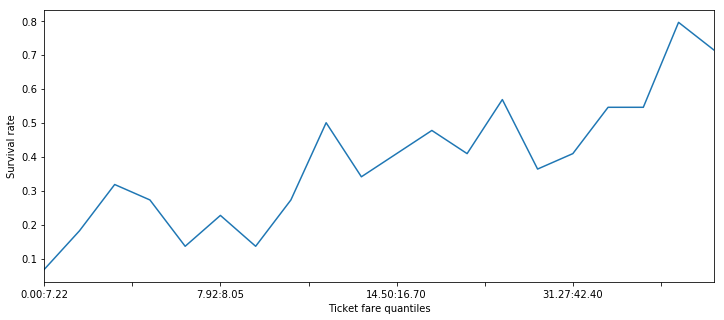

In [65]:
import math
surv_quant = pd.Series()
n_quant = 20
len_fare = len(sort_fare)
len_quant = math.ceil(len_fare/n_quant)

for i in range(0, len_fare, len_quant):
    end = i + len_quant-1 if i+len_quant < len_fare else len_fare-1
    quant = sort_fare[i:end]
    surv_rate = len(quant[survived])/len(quant)
    label = '{:.2f}:{:.2f}'.format(sort_fare.iloc[i]['Fare'],sort_fare.iloc[end]['Fare'])
    surv_quant[label]= surv_rate
    
ax = surv_quant.plot(figsize=(12,5))
ax.set_xlabel('Ticket fare quantiles')
ax.set_ylabel('Survival rate')

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [70]:
medians = pd.Series()

medians['Age'] =(df['Age'].median())
medians['Tkt price'] = (df['Fare'].median())
medians['SibSp'] = (df['SibSp'].median())
medians['Children/parents'] =(df['Parch'].median())

In [71]:
medians

Age                 28.0000
Tkt price           14.4542
SibSp                0.0000
Children/parents     0.0000
dtype: float64

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [79]:
def survival_ratio(series):
    return len(series[series['Survived']==True])/len(series)
below_median = pd.Series(name ="Survived below median")
above_median = pd.Series(name ="Survived above median")


below_median['Age'] = survival_ratio(df[df['Age']<medians['Age']])
below_median['Tkt price'] = survival_ratio(df[df['Fare']<medians['Tkt price']])
below_median['SibSp'] = survival_ratio(df[df['SibSp'] == medians['SibSp']])
below_median['Children/parents'] = survival_ratio(df[df['Parch'] == medians['Children/parents']])

above_median['Age'] = survival_ratio(df[df['Age']>medians['Age']])
above_median['Tkt price'] = survival_ratio(df[df['Fare']>medians['Tkt price']])
above_median['SibSp'] = survival_ratio(df[df['SibSp']>medians['SibSp']])
above_median['Children/parents'] = survival_ratio(df[df['Parch']>medians['Children/parents']])

surv_median = pd.DataFrame([below_median, above_median],
                          columns = ['Age', 'Tkt price', 'SibSp', 'Children/parents']).transpose()
surv_median['difference'] = above_median - below_median
surv_median

,Survived below median,Survived above median,difference
Age,0.418398,0.403409,-0.014989
Tkt price,0.252273,0.518018,0.265745
SibSp,0.345395,0.466431,0.121036
Children/parents,0.343658,0.511737,0.168079


**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

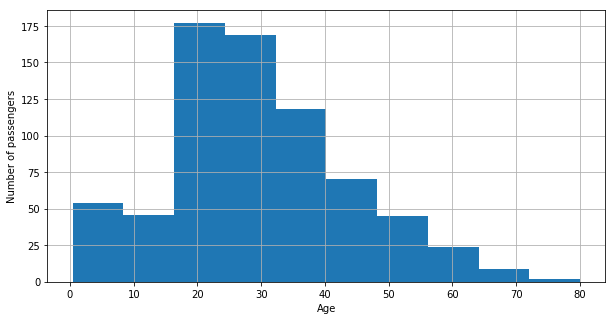

In [69]:
ax = df['Age'].hist(figsize=(10,5),bins = 10)
ax.set_xlabel('Age')
ax.set_ylabel('Number of passengers')

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old

In [83]:
def calc_prob(predicate):
    return len(df[predicate])/len(df)

def calc_prob_age(older_than= None, younger_than = None):
    pred = True
    if younger_than!=None:
        pred = (pred) & (df['Age']<younger_than)
    if older_than!=None:
        pred = (pred) & (df['Age']>older_than)
    return calc_prob(pred)

probs = pd.Series()
probs['Survived'] = calc_prob(survived)
probs['male'] = calc_prob(male)
probs['female with atleast sibling'] = calc_prob((~male) & (df['SibSp']>0))
probs['Cherbourg'] = calc_prob(df['Embarked'] == 'C')
probs['Less than 10 years old'] = calc_prob_age(younger_than = 10)
        
        

In [84]:
probs

Survived                       0.383838
male                           0.647587
female with atleast sibling    0.157127
Cherbourg                      0.188552
Less than 10 years old         0.069585
dtype: float64

**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what's the probability that exactly 42 passengers survive?**

In [85]:
import scipy.stats as stats
stats.binom.pmf(k=42, n=100, p=probs['Survived'])

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [88]:
p_41 = stats.binom.cdf(k=41, n=100, p=probs['Survived'])
p_42 = 1- p_41
p_41

0.74059275792738299

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [90]:
df_age_not_null = df.dropna(subset=['Age'])
male_ages = df_age_not_null[male]['Age']
female_ages = df_age_not_null[~male]['Age']
stats.ttest_ind(a=male_ages, b=female_ages, equal_var=False)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


Ttest_indResult(statistic=2.5258975171938896, pvalue=0.011814913211889735)

In [91]:
q_fares = df[df['Embarked']=='Q']['Fare']
c_fares = df[df['Embarked']=='C']['Fare']
stats.ttest_ind(a=q_fares, b=c_fares, equal_var=False)

Ttest_indResult(statistic=-6.9951971047186809, pvalue=4.5792033919567422e-11)

**Accompany your p-values with histograms showing the distributions of both compared populations.**

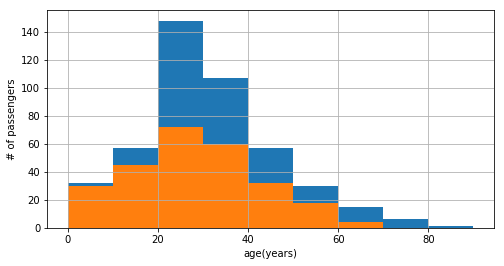

In [92]:
bins = range(0,100,10)
ax=male_ages.hist(bins = bins,figsize=(8,4))
ax = female_ages.hist(bins = bins)
ax.set_xlabel('age(years)')
ax.set_ylabel('# of passengers')

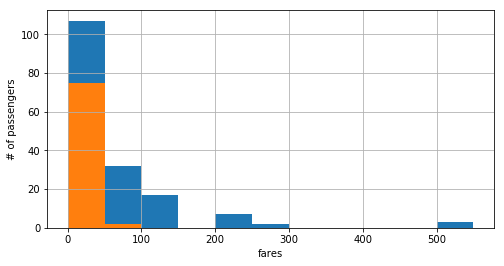

In [93]:
bins = range(0,600,50)
ax =c_fares.hist(bins = bins,figsize=(8,4))
ax =q_fares.hist(bins = bins)
ax.set_xlabel('fares')
ax.set_ylabel('# of passengers')

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [96]:
surv_fares = avg_survived['Fare']
nonsurv_fares = df[~survived]['Fare']
print(surv_fares.mean()-nonsurv_fares.mean())
stats.ttest_ind(a=surv_fares, b=nonsurv_fares, equal_var=False)

26.277520717093292


Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [99]:
df_first_class = df[first_class]
df_third_class = df[df['Pclass']==3]
fam_1class = df_first_class['SibSp'] + df_first_class['Parch']
fam_3class = df_third_class['SibSp'] + df_third_class['Parch']

print(fam_1class.mean() - fam_3class.mean())
stats.ttest_ind(a=fam_1class, b=fam_3class, equal_var=False)

-0.2349984913630534


Ttest_indResult(statistic=-2.0799075748873195, pvalue=0.037907385748521927)